In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
dataset = 'wine'
fulldata_path = "../results/processed_kFold_results/fulldata"
df_fulldata_path = f"{fulldata_path}/{dataset}_fulldata.csv"
df_fulldata = pd.read_csv(df_fulldata_path)
avg_path = "../results/processed_kFold_results/avg_by_hyper"
df_avg_path = f"{avg_path}/{dataset}.csv"
df_avg = pd.read_csv(df_avg_path)

## Results of best hyperparameter setting

In [ ]:
def get_best_fold_results(df_fulldata, df_avg, methods, bits= 4):
    """Get the best fold results for the specified methods and bits.

    Args:
        df_fulldata (pd.DataFrame): The full dataset with all folds.
        df_avg (pd.DataFrame): The averaged results across folds.
        methods (list):  List of methods to consider.
        bits (int, optional): Number of bits to use for quantization. Defaults to 4.

    Returns:
        pd.DataFrame: Per Method the results for the folds for the best hyperparameter setting.
    """
    hyperparameters = {}
    # Get the best hyperparameter setting for each method
    subset = df_avg[df_avg['bits'] == bits]
    for method in methods:
        item = subset[subset[method] == subset[method].min()]
        hyperparameters[method] = item['hyperparameter_setting_id'].values[0]

    subset = df_fulldata[df_fulldata['bits'] == bits]
    prefered_hyperparameter = pd.DataFrame(columns = methods, index = range(10))
    for method in methods:
        if prefered_hyperparameter.empty:
            prefered_hyperparameter = subset[subset['hyperparameter_setting_id'] == hyperparameters[method]]
            continue
        dfbest = subset[subset['hyperparameter_setting_id'] == hyperparameters[method]][method]
        prefered_hyperparameter[method] = dfbest.values  

    prefered_hyperparameter = prefered_hyperparameter[methods]
    
    return prefered_hyperparameter

In [106]:
methods = ['FP', 'PO-mQ', 'PO-qQ', 'PR-mQ', 'PR-qQ', 'BW-MQ', 'Bw-QQ','SQ', 'Bw-SQ']
prefered_hyperparameter = get_best_fold_results(df_fulldata, df_avg, methods)

In [ ]:
datasets = ['california',  'cpu_act', 'sulfur','wine']
best_avg_results = pd.DataFrame()
for dataset in datasets:
    fulldata_path = "../results/processed_kFold_results/fulldata"
    df_fulldata_path = f"{fulldata_path}/{dataset}_fulldata.csv"
    df_fulldata = pd.read_csv(df_fulldata_path)
    avg_path = "../results/processed_kFold_results/avg_by_hyper"
    df_avg_path = f"{avg_path}/{dataset}.csv"
    df_avg = pd.read_csv(df_avg_path)
    for bits in range(2,9):
        prefered_hyperparameter = get_best_fold_results(df_fulldata, df_avg, methods, bits)
        # prefered_hyperparameter.mean()
        current_dict = {'dataset': dataset, 'bits': bits}
        current_dict.update(prefered_hyperparameter.mean().to_dict())
        current_df = pd.DataFrame(current_dict, index=[0])
        best_avg_results = pd.concat([best_avg_results, current_df], ignore_index=True)

In [111]:
# from pandas.io.formats.latex import LatexFormatter

def bold_min_in_row(df):
    def formatter(row):
        min_val = row[2:].min()
        return [f"\\textbf{{{v:.3f}}}" if v == min_val and pd.notnull(v) else f"{v:.3f}" for v in row]
    formatted = df.copy()
    formatted.iloc[:, 2:] = df.iloc[:, 2:].apply(formatter, axis=1, result_type='expand')
    return formatted

def to_latex_multirow(df, dataset_col='dataset', bits_col='bits'):
    # Prepare the DataFrame for multirow
    df = df.copy()
    df[dataset_col] = df[dataset_col].replace('cpu_act', 'cpu\\_act')
    lines = []
    n_rows = df.shape[0]
    dataset_counts = df[dataset_col].value_counts()[df[dataset_col].unique()].tolist()
    idx = 0
    for dataset, count in zip(df[dataset_col].unique(), dataset_counts):
        for i in range(count):
            row = df.iloc[idx]
            row_str = []
            if i == 0:
                row_str.append(f"\\multirow{{{count}}}{{*}}{{{dataset}}}")
            else:
                row_str.append("")
            row_str.append(str(row[bits_col]))
            for col in df.columns[2:]:
                row_str.append(str(row[col]))
            lines.append(" & ".join(row_str) + " \\\\")
            idx += 1
        lines.append("\\hline")
    # Build the LaTeX table
    first_header = "\\multirow{2}{*}{dataset} & \\multirow{2}{*}{bits} & \\multirow{2}{*}{FP} & \\multicolumn{4}{c|}{Baseline models} & \\multicolumn{4}{c}{Our models}  \\\\"
    header = " & ".join(['','',''] + list(df.columns[3:])) + " \\\\"
    latex = "\\begin{tabular}{llr|" + "r" * (4) + '|' + "r" * (df.shape[1] - 7)  + "}\n\\toprule\n"
    latex += first_header
    latex += header + "\n\\midrule\n"
    latex += "\n".join(lines)
    latex += "\n\\bottomrule\n\\end{tabular}"
    return latex

best_avg_results['dataset'] = best_avg_results['dataset'].replace('cpu_act', 'cpu\_act')

best_avg_results_bold = bold_min_in_row(best_avg_results)
best_avg_results_bold.to_latex(
    buf='../results/tables/best_avg_results_bold.tex',
    index=False,
    escape=False,
    caption='Average MSE Loss for selected hyperparameter setting (bold: minimal per row)',
    label='tab:best_avg_results_bold',
    float_format="%.3f"
)

latex_multirow = to_latex_multirow(best_avg_results_bold)
with open('../results/tables/best_avg_results_bold_multirow.tex', 'w') as f:
    f.write(latex_multirow)

C:\Users\k_schr40\AppData\Local\Temp\ipykernel_11288\1606980607.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0.563
1     0.556
2     0.572
3     0.562
4     0.570
5     0.569
6     0.545
7     0.337
8     0.342
9     0.341
10    0.340
11    0.338
12    0.339
13    0.341
14    0.017
15    0.017
16    0.018
17    0.017
18    0.017
19    0.017
20    0.017
21    0.104
22    0.096
23    0.099
24    0.100
25    0.099
26    0.104
27    0.103
Name: 0, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  formatted.iloc[:, 2:] = df.iloc[:, 2:].apply(formatter, axis=1, result_type='expand')
C:\Users\k_schr40\AppData\Local\Temp\ipykernel_11288\1606980607.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     1.089
1     0.767
2     0.643
3     0.600
4     0.585
5     0.566
6     0.547
7  

In [99]:
best_avg_results.to_latex(buf = '../results/tables/best_avg_results.tex', index=False, caption='Average MSE Loss for selected hyperparameter setting', label='tab:best_avg_results', float_format="%.3f")

In [95]:
prefered_hyperparameter.mean()

FP       0.102845
PO-mQ    0.103469
PO-qQ    0.107003
PR-mQ    0.095411
PR-qQ    0.166770
SQ       0.171793
Bw-SQ    0.116099
BW-MQ    0.110125
Bw-QQ    0.116491
dtype: float64

## Calculate confidence interval

In [144]:
import scipy.stats as stats
def calculate_confidence_intervals(df, confidence_level=0.95):
    confidence_intervals = {}
    mean_values = df.mean()
    for column in df.columns:
        # Sample statistics
        sample_mean = df[column].mean()
        sample_std = df[column].std(ddof=1)
        n = len(df[column])
        
        # Degrees of freedom
        df_deg = n - 1
        
        # Critical value from t-distribution
        t_critical = stats.t.ppf((1 + confidence_level) / 2, df_deg)
        
        # Margin of error
        margin_of_error = t_critical * (sample_std / np.sqrt(n))
        
        # Confidence interval
        confidence_intervals[column] = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    confidence_interval_df = pd.DataFrame.from_dict(confidence_intervals, orient='index', columns=['Lower Bound', 'Upper Bound'])
    confidence_interval_df = pd.concat([confidence_interval_df, mean_values.rename('Mean')], axis=1)
    confidence_interval_df.index.name = 'Method'
    confidence_interval_df = confidence_interval_df.iloc[:,[0,2,1]]
    confidence_interval_df['Confidence Interval'] = confidence_interval_df.apply(
    lambda row: f"[{row['Lower Bound']:.3f}, {row['Upper Bound']:.3f}]", axis=1
)
    confidence_interval_df = confidence_interval_df[['Mean', 'Confidence Interval']]
    return confidence_interval_df

In [134]:
confidence_interval_df = calculate_confidence_intervals(prefered_hyperparameter)

In [135]:
confidence_interval_df

,Mean,Confidence Interval
Method,,
FP,0.102845,"[0.09, 0.12]"
PO-mQ,0.103469,"[0.09, 0.12]"
PO-qQ,0.107003,"[0.09, 0.12]"
PR-mQ,0.095411,"[0.08, 0.11]"
PR-qQ,0.166770,"[0.12, 0.22]"
BW-MQ,0.110125,"[0.09, 0.13]"
Bw-QQ,0.116491,"[0.09, 0.15]"
SQ,0.171793,"[0.13, 0.22]"
Bw-SQ,0.116099,"[0.09, 0.14]"


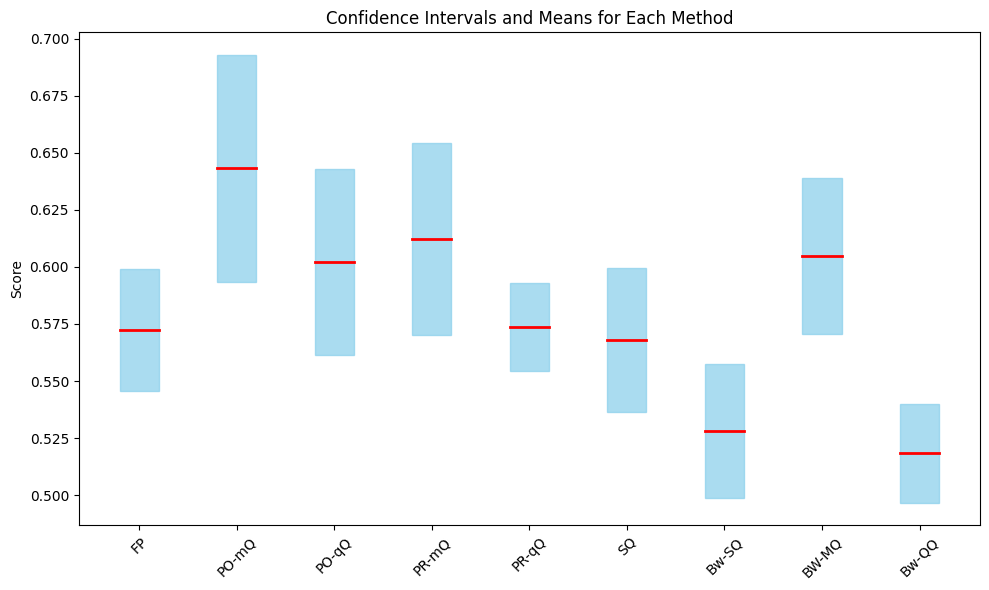

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))

methods = confidence_interval_df.index.tolist()
means = confidence_interval_df['Mean'].values
# Extract lower and upper bounds from confidence_intervals DataFrame
lower_bounds = confidence_interval_df['Lower Bound'].values
upper_bounds = confidence_interval_df['Upper Bound'].values

# Plot confidence intervals as boxes
for i, (method, lower, upper, mean) in enumerate(zip(methods, lower_bounds, upper_bounds, means)):
    ax.add_patch(plt.Rectangle((i - 0.2, lower), 0.4, upper - lower, color='skyblue', alpha=0.7))
    ax.plot([i - 0.2, i + 0.2], [mean, mean], color='red', linewidth=2)

ax.set_xticks(range(len(methods)))
ax.set_xticklabels(methods, rotation=45)
ax.set_ylabel('Score')
ax.set_title('Confidence Intervals and Means for Each Method')
plt.tight_layout()
plt.show()

In [48]:
print(confidence_interval_df.T.to_latex(index=True, caption='Confidence Intervals for Methods', label='tab:confidence_intervals', float_format="%.2f"))

\begin{table}
\caption{Confidence Intervals for Methods}
\label{tab:confidence_intervals}
\begin{tabular}{llllllllll}
\toprule
Method & FP & PO-mQ & PO-qQ & PR-mQ & PR-qQ & SQ & Bw-SQ & BW-MQ & Bw-QQ \\
\midrule
Mean & 0.57 & 0.64 & 0.60 & 0.61 & 0.57 & 0.57 & 0.53 & 0.60 & 0.52 \\
Confidence Interval & [0.545, 0.599] & [0.593, 0.693] & [0.561, 0.643] & [0.570, 0.654] & [0.555, 0.593] & [0.536, 0.599] & [0.499, 0.557] & [0.571, 0.639] & [0.497, 0.540] \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
datasets = ['california',  'cpu_act', 'sulfur','wine']
conf_interval_df = pd.DataFrame()
for dataset in datasets:
    fulldata_path = "../results/processed_kFold_results/fulldata"
    df_fulldata_path = f"{fulldata_path}/{dataset}_fulldata.csv"
    df_fulldata = pd.read_csv(df_fulldata_path)
    avg_path = "../results/processed_kFold_results/avg_by_hyper"
    df_avg_path = f"{avg_path}/{dataset}.csv"
    df_avg = pd.read_csv(df_avg_path)
    for bits in range(2,9):
        prefered_hyperparameter = get_best_fold_results(df_fulldata, df_avg, methods, bits)
        confidence_interval_df = calculate_confidence_intervals(prefered_hyperparameter)
        # prefered_hyperparameter.mean()
        current_dict = {'dataset': dataset, 'bits': bits}
        current_dict.update(confidence_interval_df['Confidence Interval'])
        current_df = pd.DataFrame(current_dict, index=[0])
        conf_interval_df = pd.concat([conf_interval_df, current_df], ignore_index=True)

In [146]:

latex_multirow_conf = to_latex_multirow(conf_interval_df)
with open('../results/tables/conf_interval_df_multirow.tex', 'w') as f:
    f.write(latex_multirow_conf)

## Calculate Confidence Interval for the Difference

In [138]:
import numpy as np
import scipy.stats as stats

# Sample data
group1 = np.array([12, 15, 14, 10, 13, 15, 11, 14, 13, 12])
group2 = np.array([19, 18, 21, 20, 17, 20, 18, 22, 21, 19])

# Calculate means and standard deviations
mean1 = np.mean(group1)
mean2 = np.mean(group2)
std1 = np.std(group1, ddof=1)  # ddof=1 for sample standard deviation
std2 = np.std(group2, ddof=1)

# Number of samples in each group
n1 = len(group1)
n2 = len(group2)

# Standard error of the difference in means
se_diff = np.sqrt((std1**2/n1) + (std2**2/n2))

# Calculate the t-score for the 95% confidence interval (one-tailed)
# degrees of freedom can be approximated using Satterthwaite's formula
df = ((std1**2/n1 + std2**2/n2)**2) / (((std1**2/n1)**2 / (n1-1)) + ((std2**2/n2)**2 / (n2-1)))
t_crit = stats.t.ppf(0.95, df)  # For a one-sided test at 95% confidence level

# Confidence interval for the difference in means
diff_means = mean1 - mean2
ci_lower = diff_means - t_crit * se_diff
ci_upper = diff_means + t_crit * se_diff

print(f"95% Confidence interval for the difference in means ({mean1} - {mean2}): [{ci_lower:.2f}, +∞)")

95% Confidence interval for the difference in means (12.9 - 19.5): [-7.86, +∞)


In [140]:
mean2

np.float64(19.5)

In [141]:
import numpy as np
from scipy.stats import mannwhitneyu

# Sample data
group1 = np.array([12, 15, 14, 10, 13, 15, 11, 14, 13, 12])
group2 = np.array([19, 18, 21, 20, 17, 20, 18, 22, 21, 19])

# Perform Mann-Whitney U Test
statistic, p_value = mannwhitneyu(group1, group2, alternative='less')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is evidence to suggest that the mean of group1 is smaller than the mean of group2.")
else:
    print("There is not enough evidence to suggest that the mean of group1 is smaller than the mean of group2.")

print(f"Mann-Whitney U Test statistic: {statistic}, p-value: {p_value}")

There is evidence to suggest that the mean of group1 is smaller than the mean of group2.
Mann-Whitney U Test statistic: 0.0, p-value: 8.731210427609635e-05


In [143]:
statistic

np.float64(0.0)